## Feature Scaling

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Maximum Absolute Scaling**.

=================================================================

## Scaling to maximum value - MaxAbsScaling

Maximum absolute scaling scales the data to its absolute maximum value:

X_scaled = X / abs(X.max)

The result of the above transformation is a distribution which values vary within the range of -1 to 1. But the mean is not centered at zero and the standard deviation varies across variables.

Scikit-learn suggests that this transformer is meant for data that is centered at zero, and for sparse data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# dataset for the demo
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

In [2]:
# load the California House price data from Scikit-learn

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [3]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales.

Note that **the maximum values are are quite different in the different variables**.

When performing maximum absolute scaling on the data set, we need to first identify the absolute maximum values of the variables. 

These parameters need to be learned from the train set, stored, and then used to scale test and future data. 

Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [4]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

### MaxAbsScaling

The MaxAbsScaler from scikit-learn re-scales features to their absolute maximum value. 

In [5]:
# set up the scaler
scaler = MaxAbsScaler().set_output(transform="pandas")

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# the scaler stores the maximum values of the features as learned from train set

scaler.max_abs_

array([1.50001000e+01, 5.20000000e+01, 1.32533333e+02, 3.40666667e+01,
       3.56820000e+04, 5.99714286e+02, 4.19500000e+01, 1.24350000e+02])

In this case, they were all positive values. But keep in mind that they can also take negative values, because we are looking for the absolute maximum.

In [7]:
# let's check the stats of the scaled data:

X_train_scaled.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00
mean,0.26,0.55,0.04,0.03,0.04,0.01,0.85,-0.96
std,0.13,0.24,0.02,0.01,0.03,0.01,0.05,0.02
min,0.03,0.02,0.01,0.01,0.00,0.00,0.78,-1.00
25%,0.17,0.35,0.03,0.03,0.02,0.00,0.81,-0.98
50%,0.24,0.56,0.04,0.03,0.03,0.00,0.82,-0.95
75%,0.32,0.71,0.05,0.03,0.05,0.01,0.90,-0.95
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-0.92


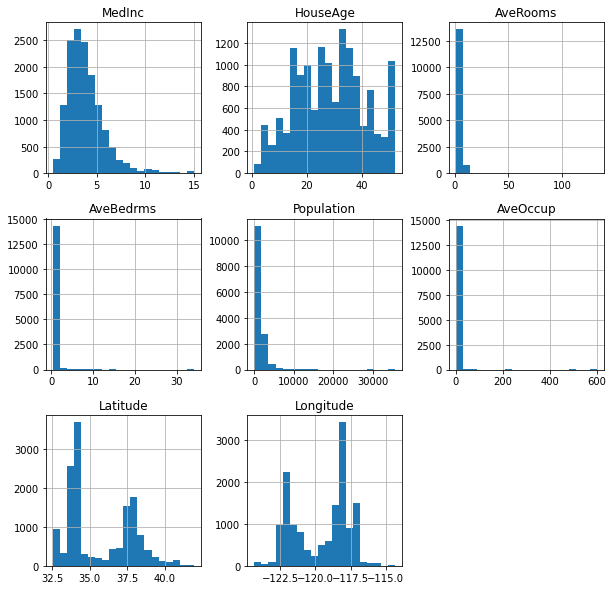

In [8]:
# Distribution before scaling:

X_train.hist(bins=20, figsize=(10,10))
plt.show()

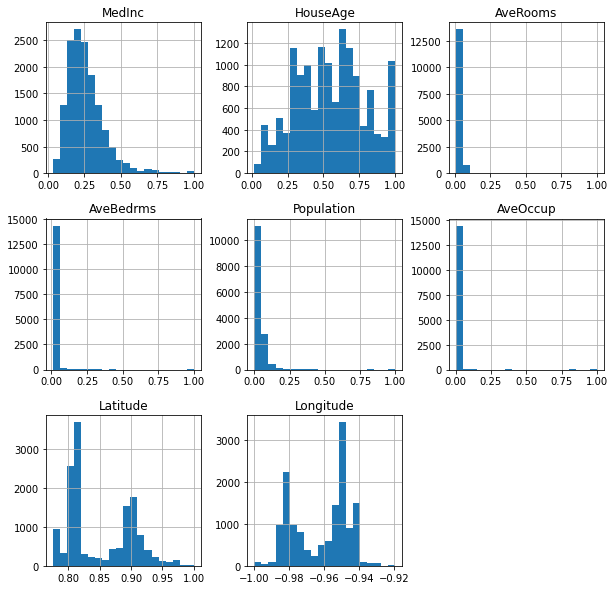

In [9]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

Variables are now scaled between -1 and 1.

## Centering + MaxAbsScaling

We can center the distributions at zero and then scale to its absolute maximum, as recommended by Scikit-learn by combining the use of 2 transformers.

In [10]:
# set up the StandardScaler to remove the mean
# without dividing by the standard deviation:
scaler_mean = StandardScaler(
    with_mean=True,
    with_std=False,
).set_output(transform="pandas")

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler().set_output(transform="pandas")

In [11]:
# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)

# we fit to the transformed data, because the maximum
# value will change with the centering
scaler_maxabs.fit(
    scaler_mean.transform(X_train)
)

# transform train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

In [12]:
# let's check the stats of the scaled data:

X_train_scaled.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,0.17,0.46,0.02,0.01,0.03,0.01,0.34,0.38
min,-0.30,-1.00,-0.04,-0.02,-0.04,-0.00,-0.49,-0.91
25%,-0.12,-0.38,-0.01,-0.00,-0.02,-0.00,-0.27,-0.42
50%,-0.03,0.01,-0.00,-0.00,-0.01,-0.00,-0.22,0.20
75%,0.08,0.30,0.00,0.00,0.01,0.00,0.33,0.30
max,1.00,0.85,1.00,1.00,1.00,1.00,1.00,1.00


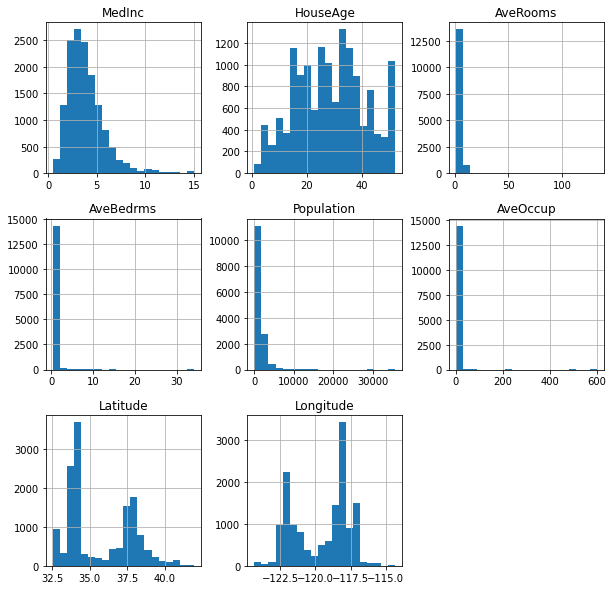

In [13]:
# Distribution before scaling:

X_train.hist(bins=20, figsize=(10,10))
plt.show()

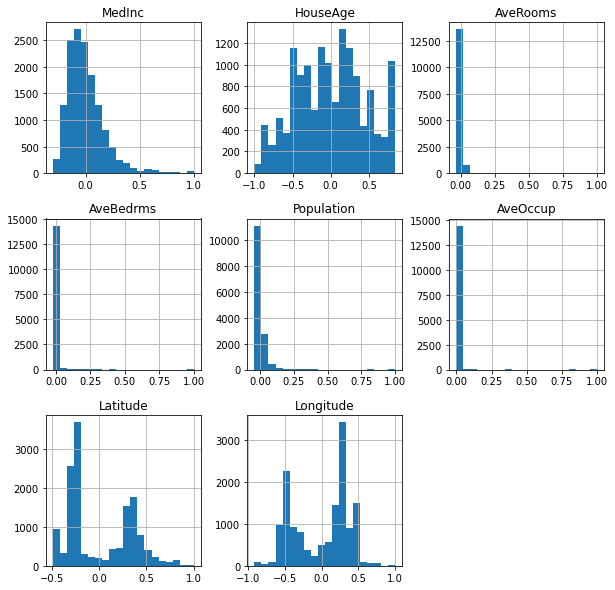

In [14]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()